In [107]:
import matplotlib.pyplot as plt
import cv2 
import pytesseract
from PIL import Image
from reportlab.lib.pagesizes import A4, letter
# Adding custom options

custom_config = r'--oem 2 --psm 11 -l fra+eng'



In [108]:
A4_int = (int(round(A4[0])), int(round(A4[1])))

In [109]:
img_path = './carte-grise-specimen_a4.jpg'

In [110]:
# img = cv2.imread('img/test1.jpg',cv2.IMREAD_UNCHANGED)
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (A4_int[0],A4_int[1]) ,interpolation=cv2.INTER_CUBIC)
img = cv2.resize(img, None,fx=2,fy=2 ,interpolation=cv2.INTER_CUBIC)

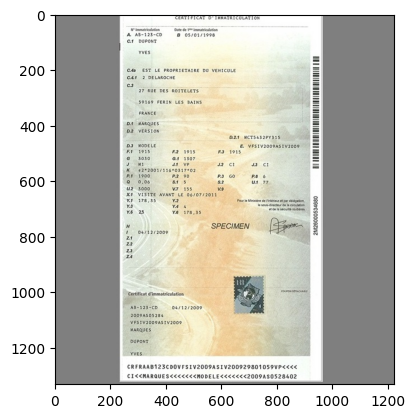

In [111]:
plt.imshow(img)

In [112]:
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [113]:
# test = pytesseract.image_to_string(Image.fromarray(img), config=custom_config)
# test

In [114]:
# Perform OCR on the RGB image using pytesseract
text = pytesseract.image_to_data(Image.fromarray(img),output_type='dict',config=custom_config)

In [115]:
boxes = len(text['level'])
for i in range(boxes ):
    (x, y, w, h) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i])
    #Draw box        
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

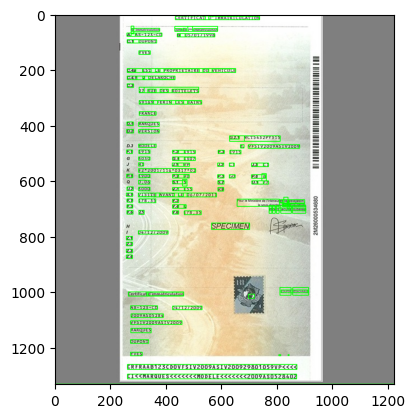

In [116]:
plt.imshow(img)

In [117]:
for i in range(boxes ):
    (x, y, w, h,chara) = (text['left'][i] , text['top'][i], text['width'][i], text['height'][i],text["text"][i])
    print(x, y, w, h,chara)

0 0 1222 1332 
432 7 303 13 
432 7 303 13 
432 7 303 13 
432 7 108 13 CERTIFICAT
552 8 183 12 D'IMNATRICULATION
273 51 103 11 
273 51 103 11 
273 51 103 11 
273 43 10 28 N*
282 51 94 11 irerratriqulotion
430 44 154 18 
430 44 154 18 
430 44 154 18 
430 52 25 10 Dote
459 51 13 11 de
477 44 17 18 1*
498 52 86 10 imrmotrioutatien
258 68 126 12 
258 68 126 12 
258 68 126 12 
258 68 15 12 A
288 68 96 12 AB-123-CD
439 70 135 12 
439 70 135 12 
439 70 135 12 
439 70 11 12 B
467 70 107 12 05/01/1998
259 92 106 12 
259 92 106 12 
259 92 106 12 
259 92 23 12 C1
301 92 64 12 DUPONT
301 132 41 13 
301 132 41 13 
301 132 41 13 
301 132 41 13 Yves
259 196 390 14 
259 196 390 14 
259 196 390 14 
259 196 31 13 C4a
314 196 31 13 EST
360 197 17 12 LE
391 197 127 13 PROPRIETAIRE
531 197 21 13 DU
564 197 85 13 VEHICULE
259 223 172 13 
259 223 172 13 
259 223 172 13 
259 223 35 13 C41
315 223 7 12 2
336 223 95 12 DELAROCHE
259 251 23 13 
259 251 23 13 
259 251 23 13 
259 251 23 13 cs3
302 263 214 20 
302 2

In [118]:
def adjust_text_boxes(text_data):
    # Zip the text data into tuples for easier manipulation
    boxes = list(zip([pos * A4[0] / img.shape[1] for pos in text_data['left']], 
                     [A4[1] - pos * A4[1]/img.shape[0] for pos in text_data['top']], 
                     [pos * A4[0] / img.shape[1] for pos in text_data['width']],
                       [pos * A4[1]/img.shape[0]  for pos in text_data['height']],
                         text_data['text']))

    # Sort the text boxes based on their vertical positions (top to bottom)
    sorted_boxes = sorted(boxes, key=lambda box: box[1])

    # Set a threshold for height difference to identify text on the same line
    threshold_height = 16 * A4[1]/img.shape[0]  # Adjust this value as needed
    threshold_font_size = 4
    # Correct text boxes that are too close in height
    for i in range(len(sorted_boxes) - 1):
        current_box = sorted_boxes[i]
        next_box = sorted_boxes[i + 1]

        # If the vertical distance between the current and next box is within the threshold
        if abs(current_box[1] - next_box[1]) < threshold_height:
            # Adjust the next box's top position to align it with the current box
            new_top = current_box[1]
            sorted_boxes[i + 1] = (next_box[0], new_top, next_box[2], next_box[3], next_box[4])
        if abs(current_box[3] - next_box[3]) < threshold_font_size:
                
                sorted_boxes[i + 1] = (sorted_boxes[i + 1][0], sorted_boxes[i + 1][1], sorted_boxes[i + 1][2], current_box[3], sorted_boxes[i + 1][4]) 
 

    # Unzip the corrected data
    corrected_data = {
        'left': [box[0] for box in sorted_boxes],
        'top': [box[1] for box in sorted_boxes],
        'width': [box[2] for box in sorted_boxes],
        'height': [box[3] for box in sorted_boxes],
        'text': [box[4] for box in sorted_boxes]
    }

    return corrected_data

# Example usage:
# Assuming 'text' contains the extracted text data similar to what you previously retrieved from Tesseract
corrected_text_data = adjust_text_boxes(text)

In [119]:
set(corrected_text_data["height"])

{2.5281974888274106,
 6.952543094275378,
 7.584592466482232,
 8.216641838689084,
 8.848691210895936,
 10.744839327516495,
 14.537135560757612,
 15.169184932964464,
 16.433283677378167,
 17.697382421791872,
 841.8897637795276}

In [120]:
from reportlab.pdfgen import canvas

def hello(c,left,top,text,pixel):
    c.setFont("Helvetica", pixel)
    c.drawString(left,top,text,charSpace=0.25)
c = canvas.Canvas("hello.pdf")
boxes_correct = len(corrected_text_data["left"])
for i in range(boxes ):
    if corrected_text_data["text"][i] !="": 
        (x, y, w, h,chara) = (corrected_text_data['left'][i]  ,corrected_text_data['top'][i], corrected_text_data['width'][i], corrected_text_data['height'][i],corrected_text_data["text"][i])
        hello(c,x,y,chara,h)
        # c.rect(x, y, w, h-1)
c.showPage()
c.save()

In [135]:
import sys
import cv2
import numpy as np
import pytesseract
from datetime import datetime

startTime = datetime.now()

input_image_path = sys.argv[1]

img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None,fx=2,fy=2 ,interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
invGamma = 1.0 / 0.3
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(
    "uint8"
)

# apply gamma correction using the lookup table
gray = cv2.LUT(gray, table)

ret, thresh1 = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[
    -2:
]


def biggestRectangle(contours):
    biggest = True
    max_area = 0
    indexReturn = -1
    for index in range(len(contours)):
        i = contours[index]
        area = cv2.contourArea(i)
        if area > 100:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.1 * peri, True)
            if area > max_area:  # and len(approx)==4:
                biggest = approx
                max_area = area
                indexReturn = index
    return indexReturn


indexReturn = biggestRectangle(contours)
hull = cv2.convexHull(contours[indexReturn])

# create a crop mask
mask = np.zeros_like(img)  # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, indexReturn, 255, -1)  # Draw filled contour in mask
out = np.zeros_like(img)  # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

# crop the image
(y, x, _) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = img[topy : bottomy + 1, topx : bottomx + 1, :]

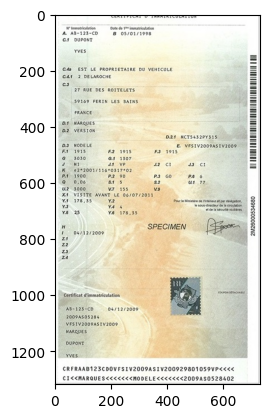

In [136]:
plt.imshow(out)

In [137]:
text = pytesseract.image_to_data(Image.fromarray(out),output_type='dict',config=custom_config)
for i in range(boxes ):
    (x, y, w, h,chara) = (text['left'][i] , text['top'][i], text['width'][i], text['height'][i],text["text"][i])
    print(x, y, w, h,chara)

0 0 730 1318 
200 1 293 13 
200 1 293 13 
200 1 293 13 
200 1 108 13 CERTIFICAT
320 2 173 12 D'IMNATRICULATIO!
41 45 103 11 
41 45 103 11 
41 45 103 11 
37 37 14 28 N*
58 45 86 11 irerratriqulotion
198 45 154 11 
198 45 154 11 
198 45 154 11 
194 37 28 28 Dote
226 37 13 28 de
245 37 15 28 1#*
266 45 86 11 immmotriostation
26 62 126 12 
26 62 126 12 
26 62 126 12 
26 62 15 12 A
56 62 96 12 AB-123-CD
207 64 135 12 
207 64 135 12 
207 64 135 12 
207 64 11 12 B
235 64 107 12 05/01/1998
27 86 106 12 
27 86 106 12 
27 86 106 12 
27 86 23 12 C1
69 86 64 12 DUPONT
69 126 41 13 
69 126 41 13 
69 126 41 13 
69 126 41 13 Yves
27 190 390 14 
27 190 390 14 
27 190 390 14 
27 190 31 13 C4a
82 190 31 13 EST
128 191 17 12 LE
159 191 127 12 PROPRIETAIRE
299 191 21 12 DU
332 192 85 12 VEHICULE
27 217 172 13 
27 217 172 13 
27 217 172 13 
27 217 35 13 C41
83 217 7 12 2
104 217 95 12 DELAROCHE
42 245 8 13 
42 245 8 13 
42 245 8 13 
42 245 8 13 3
70 264 214 13 
70 264 214 13 
70 264 214 13 
70 264 18 12 27

In [138]:
boxes = len(text['level'])
for i in range(boxes ):
    (x, y, w, h) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i])
    #Draw box        
    cv2.rectangle(out, (x, y), (x + w, y + h), (0, 255, 0), 2)

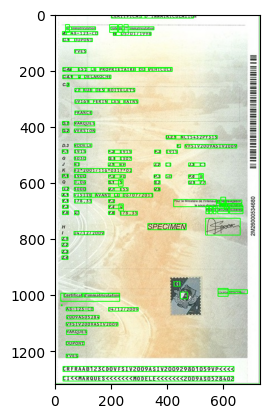

In [139]:
plt.imshow(out)